In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import multinomial
from scipy.special import loggamma, xlogy
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
#%matplotlib

In [2]:
def new_z(contigs):
    mean = contigs.mean(axis=0)
    fractions = mean/mean.sum()
    E = (contigs.sum(axis=1) * np.ones(contigs.shape).T).T * fractions
    alt_z = (contigs - E)/np.sqrt(E)
    return alt_z

In [98]:
counts = pd.read_csv("./pca1_tnf.csv")
labels = counts['genome']
labels = labels.values
counts = counts.drop('genome',axis=1)
c = counts.values
X = new_z(c)

In [99]:
pca = PCA()
pca.fit(X)
pca_data = pca.transform(X)

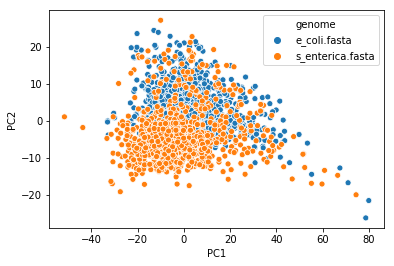

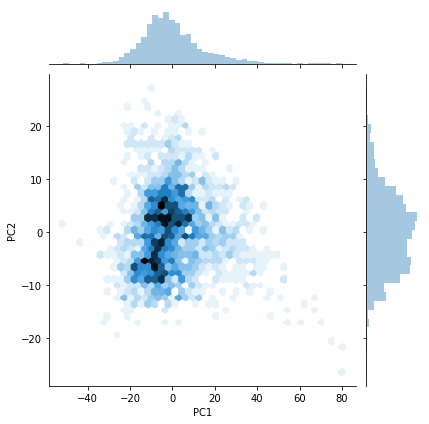

In [100]:
pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
pca_df['genome']=labels

sns.scatterplot(x='PC1', y='PC2', hue='genome', data=pca_df)
sns.jointplot(x='PC1', y='PC2', data=pca_df, kind="hex")

In [101]:
clust = OPTICS(min_samples=50, xi=0.001, min_cluster_size=.05)
clust.fit(pca_data[:,:20])

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=50, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.001)

In [102]:
space = np.arange(len(pca_data))
reachability = clust.reachability_[clust.ordering_]
clusters = set(labels)
number_of_clusters = len(clusters)

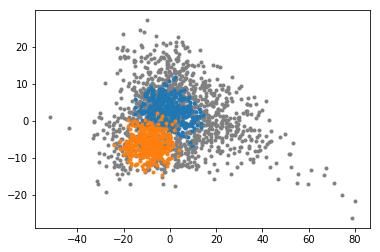

In [103]:
noise = pca_data[clust.labels_ == -1]
X1 = pca_data[clust.labels_ == 0]
X2 = pca_data[clust.labels_ == 1]
plt.plot(noise[:,0], noise[:,1], '.', color='gray')
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.show()

In [104]:
gmm = GaussianMixture(n_components=number_of_clusters, covariance_type='full')
labels = gmm.fit_predict(pca_data[:,:8])

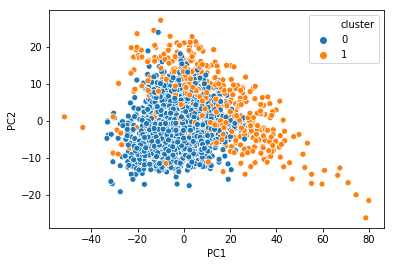

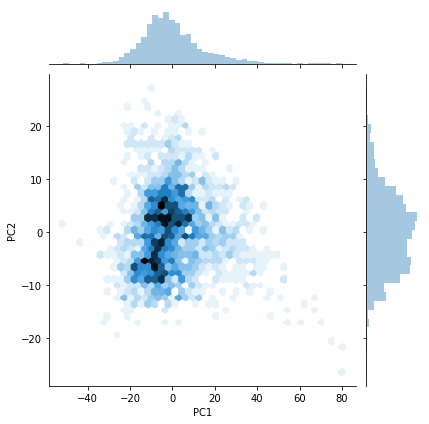

In [105]:
pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
pca_df['cluster']=labels

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df)
sns.jointplot(x='PC1', y='PC2', data=pca_df, kind="hex")